# Mahdie Dolatabadi.400443077



DBSCAN is a density-based unsupervised machine learning algorithm to clustring

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

# Blobs data

# Generate sample data

In [2]:
centers = [[1,1], [3,3]]
X, labels_true = make_blobs(
    n_samples=750, centers=centers, cluster_std=0.4, random_state=0)

X = StandardScaler().fit_transform(X)


# Compute DBSCAN

In [3]:
db = DBSCAN(eps=0.5, min_samples=10).fit(X)

# Loading generated labels

In [4]:
labels = db.labels_

In [5]:
no_clusters = len(np.unique(labels) )
no_noise = np.sum(np.array(labels) == -1, axis=0)

In [6]:
no_clusters

2

In [7]:
no_noise

0

# plotting clustering data

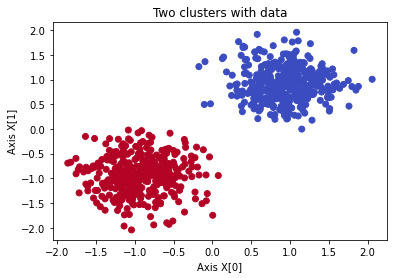

In [8]:
colors = list(map(lambda x: '#3b4cc0' if x == 1 else '#b40426', labels))
plt.scatter(X[:,0], X[:,1], c=colors, marker="o", picker=True)
plt.title('Two clusters with data')
plt.xlabel('Axis X[0]')
plt.ylabel('Axis X[1]')
plt.show()

In [9]:
from sklearn import datasets ,cluster
n_samples = 750

In [ ]:
blobs = datasets.make_blobs(n_samples=n_samples, centers=centers,cluster_std=0.4, random_state=0)
noisy_circles = datasets.make_circles(n_samples=n_samples, noise = 0.05, factor = 0.5)
noisy_moons = datasets.make_moons(n_samples = n_samples,noise = 0.05, random_state= 1 )

In [ ]:
eps0 =np.array([0.5, 0.2, 0.5])
eps1 =np.array([0.73, 0.43, 0.56])
eps2 =np.array([0.3, 0.19, 0.15])
eps3 =np.array([0.2, 0.15, 0.1])
eps4 =np.array([0.8, 0.5, 0.6])
datasets = [
            blobs,
    noisy_circles,
    noisy_moons,
]

In [ ]:
def dbscan(datasets,eps):
  for i_dataset, dataset in enumerate(datasets):

    X, y = dataset
    # normalize dataset
    X = StandardScaler().fit_transform(X)
    dbscan = cluster.DBSCAN(eps=eps[i_dataset],min_samples=5).fit(X)
    y = dbscan.labels_.astype(np.int)
    colors = list(map(lambda x: '#3b4cc0' if x == 1 else '#b40426', y))
    plt.scatter(X[:,0], X[:,1], c=colors, marker="o", picker=True)
    plt.title('Two clusters with data')
    plt.xlabel('Axis X[0]')
    plt.ylabel('Axis X[1]')
    plt.show()


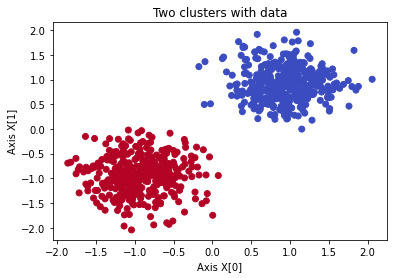

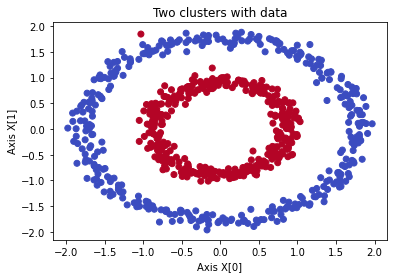

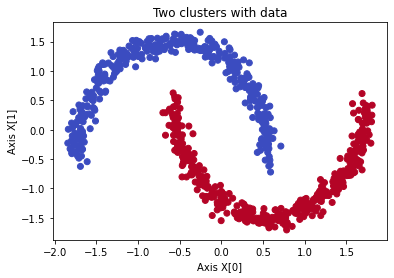

In [ ]:
dbscan(datasets,eps0)

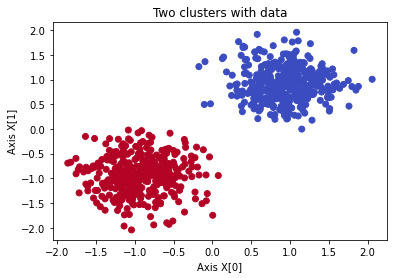

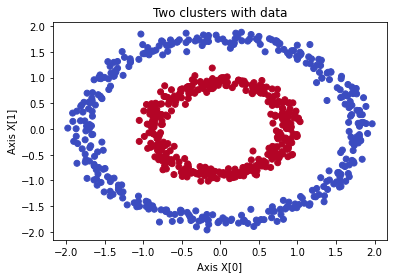

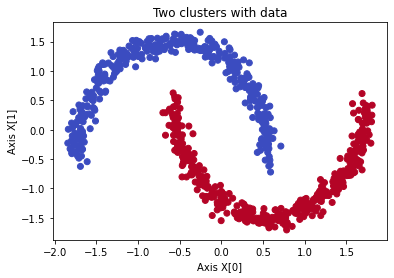

In [ ]:
dbscan(datasets,eps1)

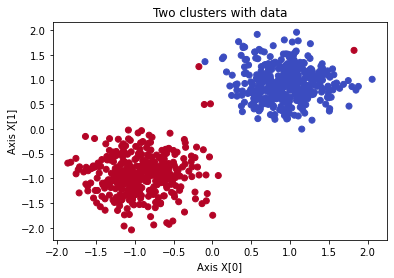

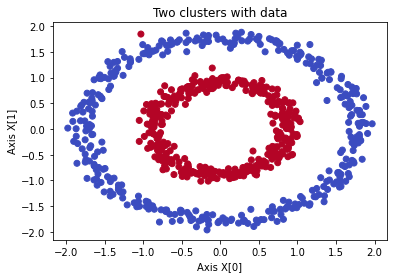

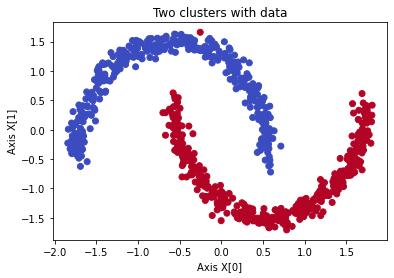

In [ ]:
dbscan(datasets,eps2)

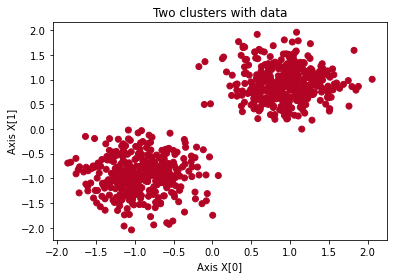

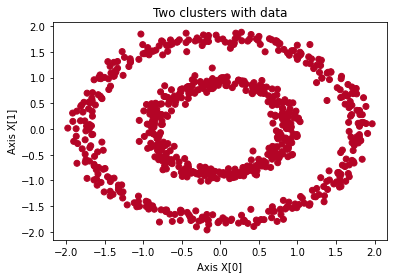

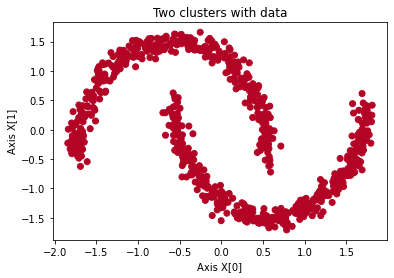

In [ ]:
dbscan(datasets,eps4)

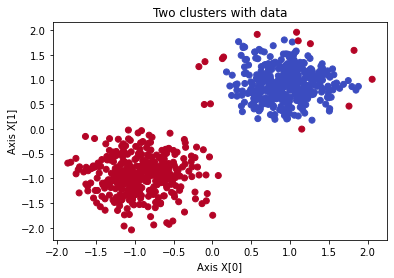

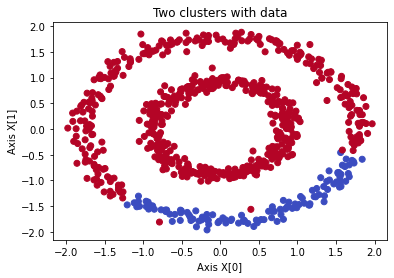

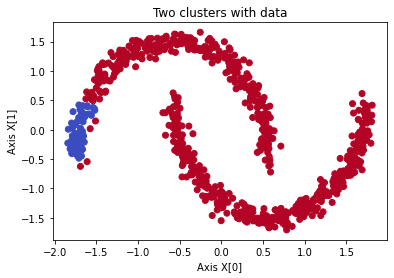

In [ ]:
dbscan(datasets,eps3)

## Now if we have different densities

In [3]:
pip install kneed

In [30]:
import seaborn as sns

from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.datasets import make_blobs, make_circles, make_moons
from kneed import KneeLocator

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


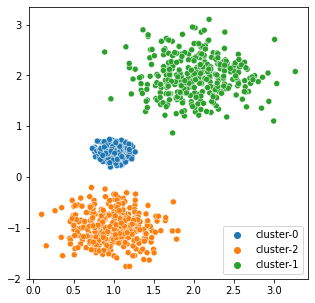

In [5]:
centers = [[1, 0.5], [2, 2], [1, -1]]
stds = [0.1, 0.4, 0.3]
X, labels_true = make_blobs(n_samples=1000, centers=centers, cluster_std=stds, random_state=0)

fig = plt.figure(figsize=(5, 5))
sns.scatterplot(X[:,0], X[:,1], hue=["cluster-{}".format(x) for x in labels_true])
plt.savefig("blobs.png", dpi=300)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


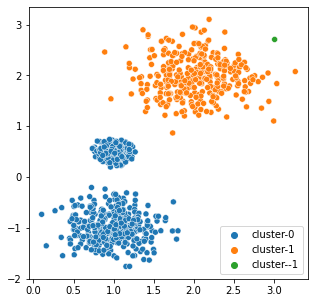

In [6]:
db = DBSCAN(eps=0.5, min_samples=10).fit(X)
labels = db.labels_

fig = plt.figure(figsize=(5, 5))
sns.scatterplot(X[:,0], X[:,1], hue=["cluster-{}".format(x) for x in labels])
plt.savefig("dbscan_dumb.png", dpi=300)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

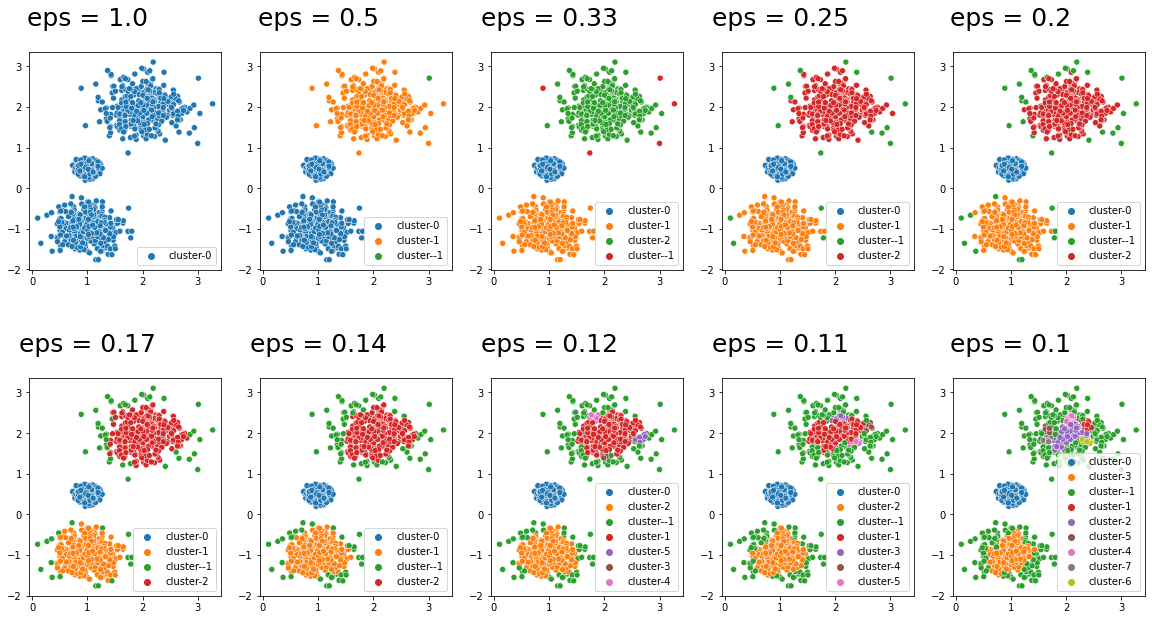

In [7]:
fig = plt.figure(figsize=(20, 10))
fig.subplots_adjust(hspace=.5, wspace=.2)
i = 1

for x in range(10, 0, -1):
    eps = 1/(11-x)
    db = DBSCAN(eps=eps, min_samples=10).fit(X)
    core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
    core_samples_mask[db.core_sample_indices_] = True
    labels = db.labels_
    
    ax = fig.add_subplot(2, 5, i)
    ax.text(1, 4, "eps = {}".format(round(eps, 2)), fontsize=25, ha="center")
    sns.scatterplot(X[:,0], X[:,1], hue=["cluster-{}".format(x) for x in labels])
    
    i += 1
    
plt.savefig("multi_eps.png", dpi=300)

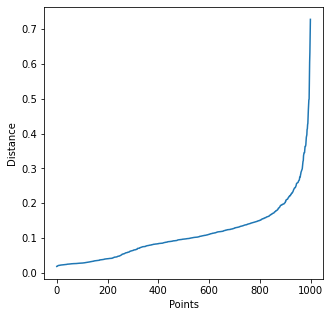

In [8]:
nearest_neighbors = NearestNeighbors(n_neighbors=11)
neighbors = nearest_neighbors.fit(X)
distances, indices = neighbors.kneighbors(X)

distances = np.sort(distances[:,10], axis=0)
i = np.arange(len(distances))
knee = KneeLocator(i, distances, S=1, curve='convex', direction='increasing', interp_method='polynomial')

fig = plt.figure(figsize=(5, 5))
plt.plot(distances)
plt.xlabel("Points")
plt.ylabel("Distance")

plt.savefig("Distance_curve.png", dpi=300)

0.18723454491446345


<Figure size 360x360 with 0 Axes>

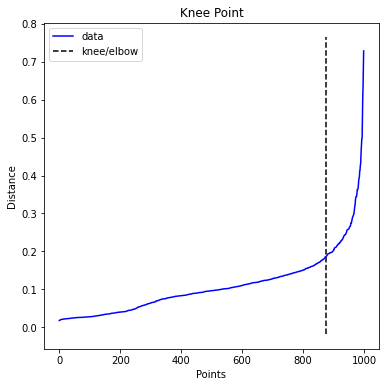

In [9]:
fig = plt.figure(figsize=(5, 5))
knee.plot_knee()
plt.xlabel("Points")
plt.ylabel("Distance")
plt.savefig("knee.png", dpi=300)
print(distances[knee.knee])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


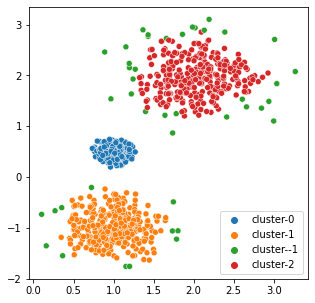

In [10]:
db = DBSCAN(eps=distances[knee.knee], min_samples=10).fit(X)
labels = db.labels_

fig = plt.figure(figsize=(5, 5))
sns.scatterplot(X[:,0], X[:,1], hue=["cluster-{}".format(x) for x in labels])
plt.savefig("dbscan_with_knee.png", dpi=300)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


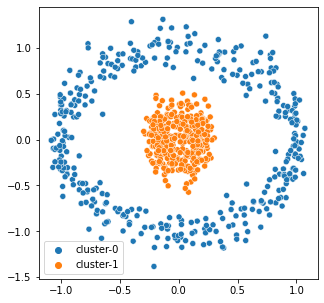

In [25]:
noises = [0.05,0.15]
fact = 0.2
X, labels_true = make_circles(n_samples=n_samples, noise = noises,random_state=10, factor = fact)
fig = plt.figure(figsize=(5, 5))
sns.scatterplot(X[:,0], X[:,1], hue=["cluster-{}".format(x) for x in labels_true])
plt.savefig("circles.png", dpi=300)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

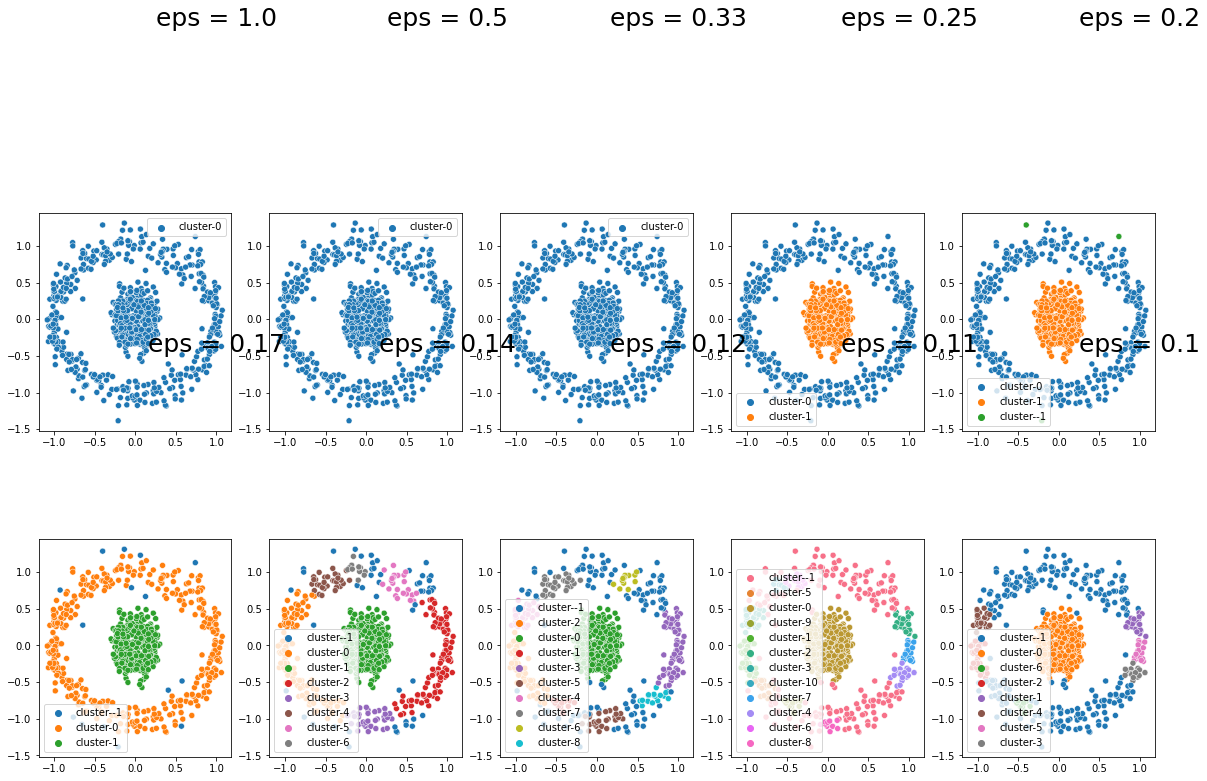

In [26]:
fig = plt.figure(figsize=(20, 10))
fig.subplots_adjust(hspace=.5, wspace=.2)
i = 1

for x in range(10, 0, -1):
    eps = 1/(11-x)
    db = DBSCAN(eps=eps, min_samples=10).fit(X)
    core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
    core_samples_mask[db.core_sample_indices_] = True
    labels = db.labels_
    
    ax = fig.add_subplot(2, 5, i)
    ax.text(1, 4, "eps = {}".format(round(eps, 2)), fontsize=25, ha="center")
    sns.scatterplot(X[:,0], X[:,1], hue=["cluster-{}".format(x) for x in labels])
    
    i += 1
    
plt.savefig("multi_eps.png", dpi=300)

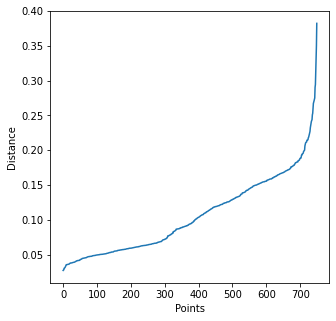

In [27]:
nearest_neighbors = NearestNeighbors(n_neighbors=11)
neighbors = nearest_neighbors.fit(X)
distances, indices = neighbors.kneighbors(X)

distances = np.sort(distances[:,10], axis=0)
i = np.arange(len(distances))
knee = KneeLocator(i, distances, S=1, curve='convex', direction='increasing', interp_method='polynomial')

fig = plt.figure(figsize=(5, 5))
plt.plot(distances)
plt.xlabel("Points")
plt.ylabel("Distance")

plt.savefig("Distance_curve.png", dpi=300)

0.17206471713842603


<Figure size 360x360 with 0 Axes>

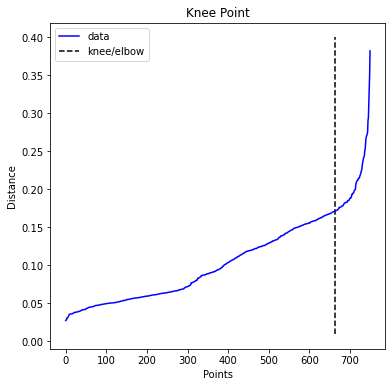

In [28]:
fig = plt.figure(figsize=(5, 5))
knee.plot_knee()
plt.xlabel("Points")
plt.ylabel("Distance")
plt.savefig("knee.png", dpi=300)
print(distances[knee.knee])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


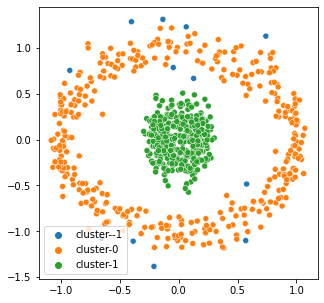

In [29]:
db = DBSCAN(eps=distances[knee.knee], min_samples=10).fit(X)
labels = db.labels_

fig = plt.figure(figsize=(5, 5))
sns.scatterplot(X[:,0], X[:,1], hue=["cluster-{}".format(x) for x in labels])
plt.savefig("dbscan_with_knee.png", dpi=300)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


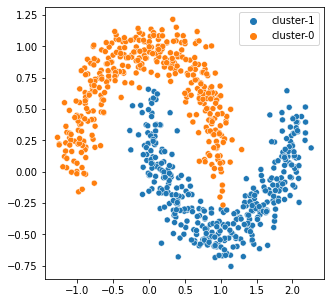

In [46]:
noises = [0.12]
fact = 0.2
X, labels_true = datasets.make_moons(n_samples = n_samples,noise = noises, random_state= 1 )
fig = plt.figure(figsize=(5, 5))
sns.scatterplot(X[:,0], X[:,1], hue=["cluster-{}".format(x) for x in labels_true])
plt.savefig("circles.png", dpi=300)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

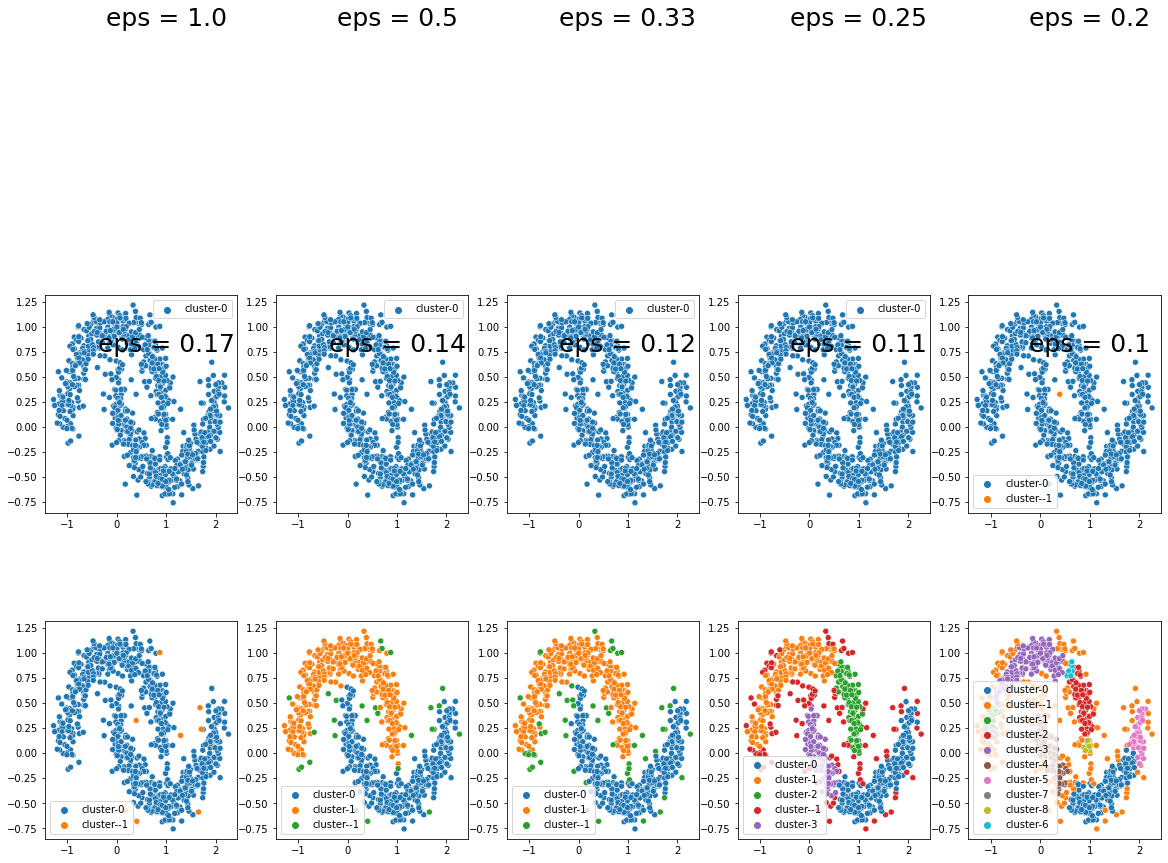

In [47]:
fig = plt.figure(figsize=(20, 10))
fig.subplots_adjust(hspace=.5, wspace=.2)
i = 1

for x in range(10, 0, -1):
    eps = 1/(11-x)
    db = DBSCAN(eps=eps, min_samples=10).fit(X)
    core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
    core_samples_mask[db.core_sample_indices_] = True
    labels = db.labels_
    
    ax = fig.add_subplot(2, 5, i)
    ax.text(1, 4, "eps = {}".format(round(eps, 2)), fontsize=25, ha="center")
    sns.scatterplot(X[:,0], X[:,1], hue=["cluster-{}".format(x) for x in labels])
    
    i += 1
    
plt.savefig("multi_eps.png", dpi=300)

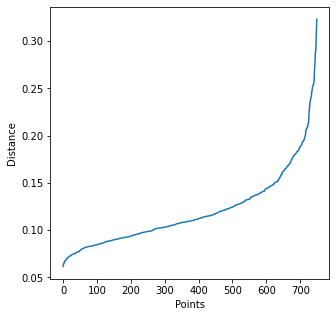

In [48]:
nearest_neighbors = NearestNeighbors(n_neighbors=11)
neighbors = nearest_neighbors.fit(X)
distances, indices = neighbors.kneighbors(X)

distances = np.sort(distances[:,10], axis=0)
i = np.arange(len(distances))
knee = KneeLocator(i, distances, S=1, curve='convex', direction='increasing', interp_method='polynomial')

fig = plt.figure(figsize=(5, 5))
plt.plot(distances)
plt.xlabel("Points")
plt.ylabel("Distance")

plt.savefig("Distance_curve.png", dpi=300)

0.15577001175013272


<Figure size 360x360 with 0 Axes>

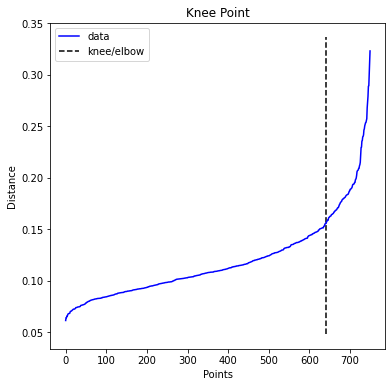

In [49]:
fig = plt.figure(figsize=(5, 5))
knee.plot_knee()
plt.xlabel("Points")
plt.ylabel("Distance")
plt.savefig("knee.png", dpi=300)
print(distances[knee.knee])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


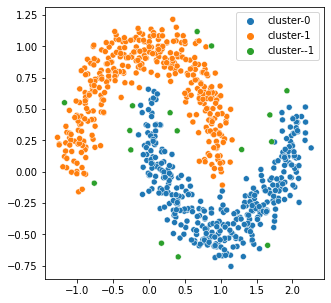

In [50]:
db = DBSCAN(eps=distances[knee.knee], min_samples=10).fit(X)
labels = db.labels_

fig = plt.figure(figsize=(5, 5))
sns.scatterplot(X[:,0], X[:,1], hue=["cluster-{}".format(x) for x in labels])
plt.savefig("dbscan_with_knee.png", dpi=300)